In [19]:
import pandas as pd
import numpy as np
import matplotlib as plt 
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt




In [20]:
df= pd.read_csv('bitcoin_datas.csv')
df.head()


Timestamp  High Price (USD)  Low Price (USD)  Open Price (USD)  \
0   8/30/2024 9:00          59666.14         59428.88          59459.13   
1  8/30/2024 10:00          59678.05         59443.12          59587.92   
2  8/30/2024 11:00          59652.23         59328.32          59594.45   
3  8/30/2024 12:00          59926.33         59387.27          59406.78   
4  8/30/2024 13:00          59680.48         58924.66          59545.91   

   Volume From (BTC)  Volume To (USD)  Closing Price (USD) conversionType  \
0             665.55     3.964307e+07             59587.92         direct   
1             539.29     3.212339e+07             59594.45         direct   
2             674.37     4.009850e+07             59406.78         direct   
3            1670.53     9.960352e+07             59545.91         direct   
4            1843.55     1.095138e+08             59664.32         direct   

  conversionSymbol  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN

In [21]:
df = df.drop(['conversionType','conversionSymbol'], axis=1)
df.head()

Timestamp  High Price (USD)  Low Price (USD)  Open Price (USD)  \
0   8/30/2024 9:00          59666.14         59428.88          59459.13   
1  8/30/2024 10:00          59678.05         59443.12          59587.92   
2  8/30/2024 11:00          59652.23         59328.32          59594.45   
3  8/30/2024 12:00          59926.33         59387.27          59406.78   
4  8/30/2024 13:00          59680.48         58924.66          59545.91   

   Volume From (BTC)  Volume To (USD)  Closing Price (USD)  
0             665.55     3.964307e+07             59587.92  
1             539.29     3.212339e+07             59594.45  
2             674.37     4.009850e+07             59406.78  
3            1670.53     9.960352e+07             59545.91  
4            1843.55     1.095138e+08             59664.32

partern 1

In [22]:
import plotly.graph_objects as go 
figure = go.Figure(data = [go.Candlestick(x = df["Timestamp"],
                                          open = df["Open Price (USD)"],
                                          close = df["Closing Price (USD)"],
                                          low = df["Low Price (USD)"],
                                          high = df["High Price (USD)"])])
figure.update_layout(title = "Bitcoin Price Analysis in all data", xaxis_rangeslider_visible = True)
figure.show()


Text(0.5, 1.0, 'Biểu đồ theo giờ')

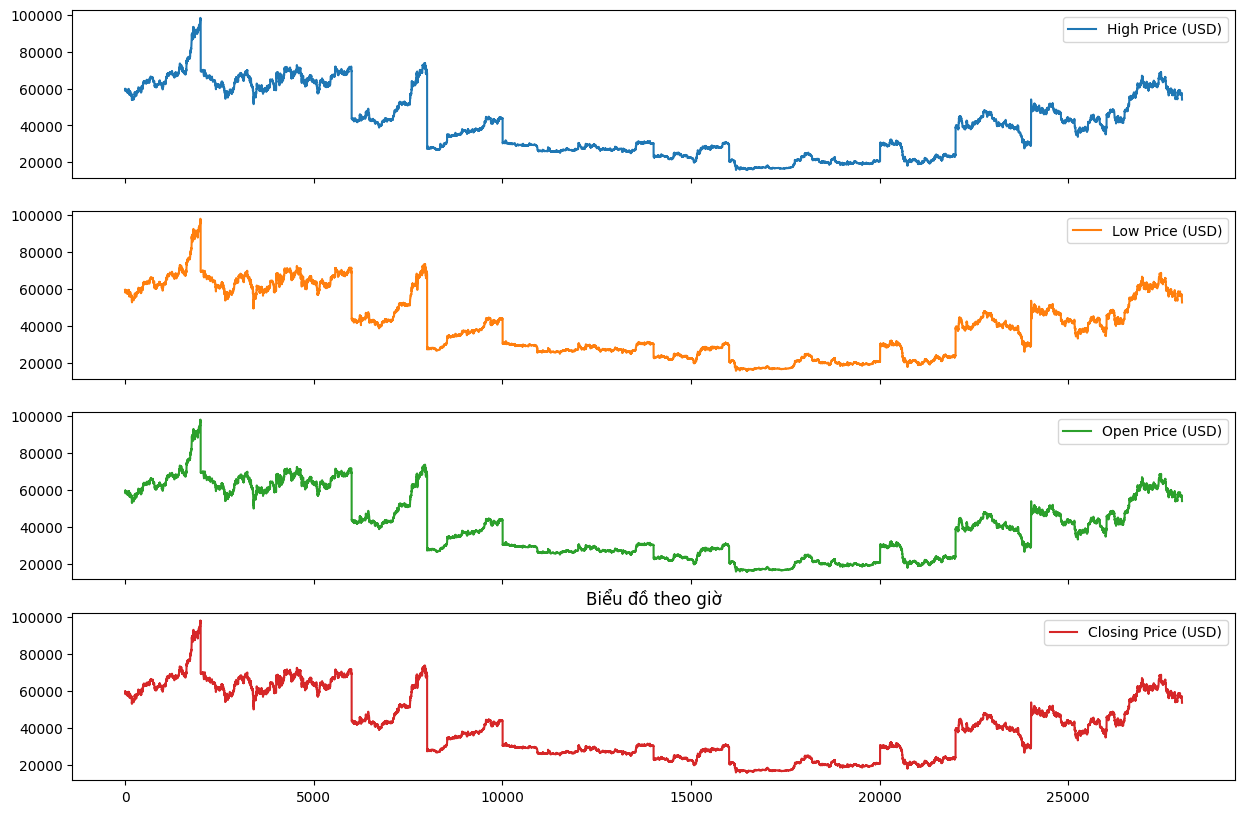

In [23]:
df[['High Price (USD)','Low Price (USD)','Open Price (USD)','Closing Price (USD)']].plot(subplots=True, figsize=(15,10))
plt.title('Biểu đồ theo giờ')

In [24]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['Day']= df['Timestamp'].dt.to_period('D')
df['Month'] = df['Timestamp'].dt.to_period('M')
df['Week'] = df['Timestamp'].dt.to_period('W')
df['Quarter'] = df['Timestamp'].dt.to_period('Q')
df['Year'] = df['Timestamp'].dt.to_period('Y')



In [25]:
# Theo lấy dòng đầu tiên của mỗi nhóm
df_day = df.groupby('Day').first().reset_index()
df_monthly = df.groupby('Month').first().reset_index()
df_week = df.groupby('Week').first().reset_index()
df_year = df.groupby('Year').first().reset_index()

Text(0.5, 1.0, 'Biểu đồ theo ngày')

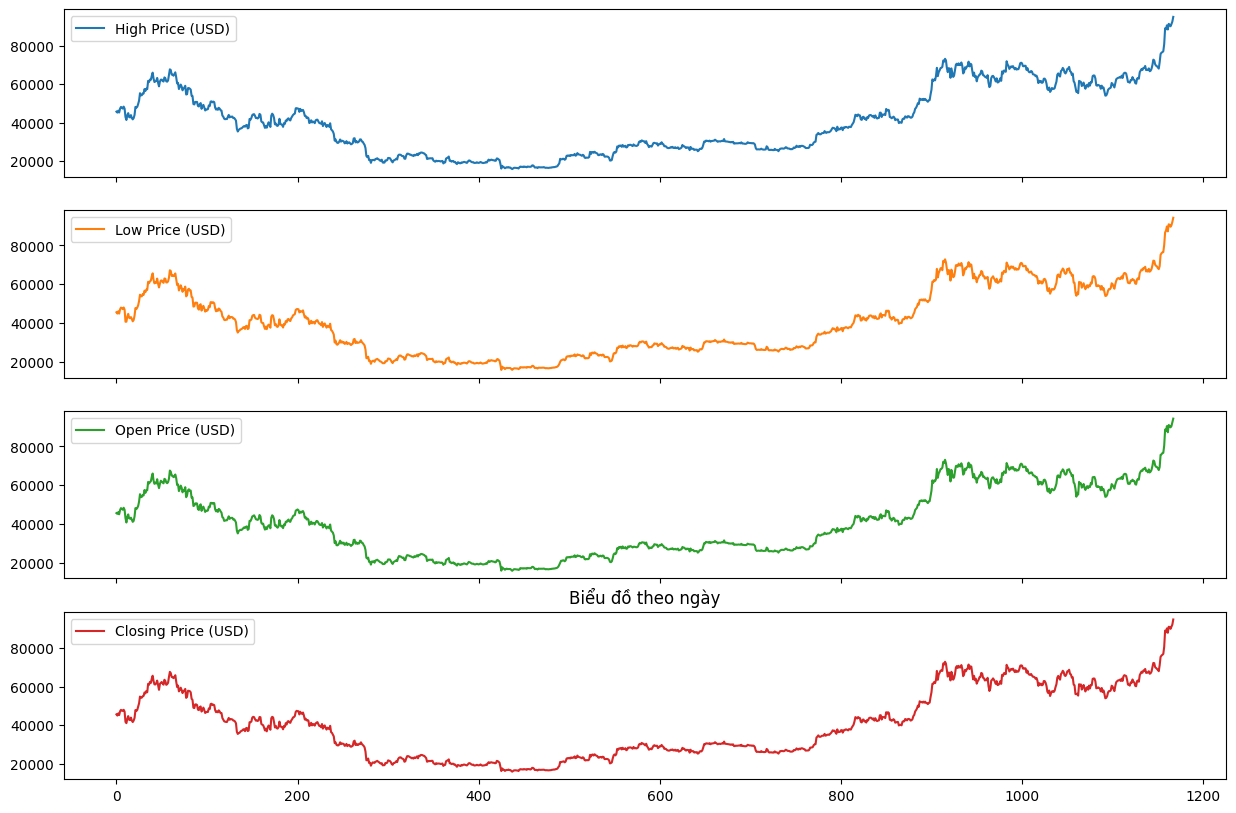

In [26]:
df_day[['High Price (USD)','Low Price (USD)','Open Price (USD)','Closing Price (USD)']].plot(subplots=True, figsize=(15,10))
plt.title('Biểu đồ theo ngày')

Text(0.5, 1.0, 'Biểu đồ theo tuần')

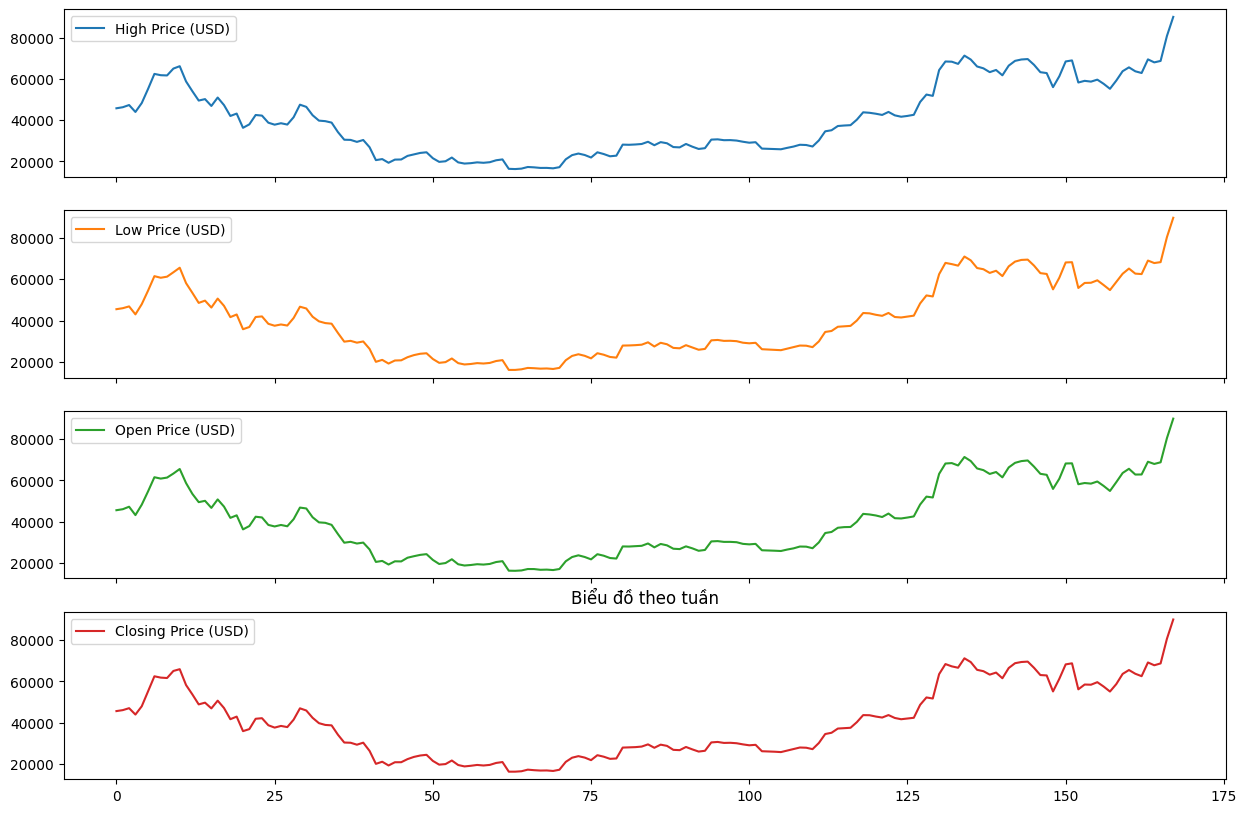

In [27]:
df_week[['High Price (USD)','Low Price (USD)','Open Price (USD)','Closing Price (USD)']].plot(subplots=True, figsize=(15,10))
plt.title('Biểu đồ theo tuần')

Text(0.5, 1.0, 'Biểu đồ theo tuần')

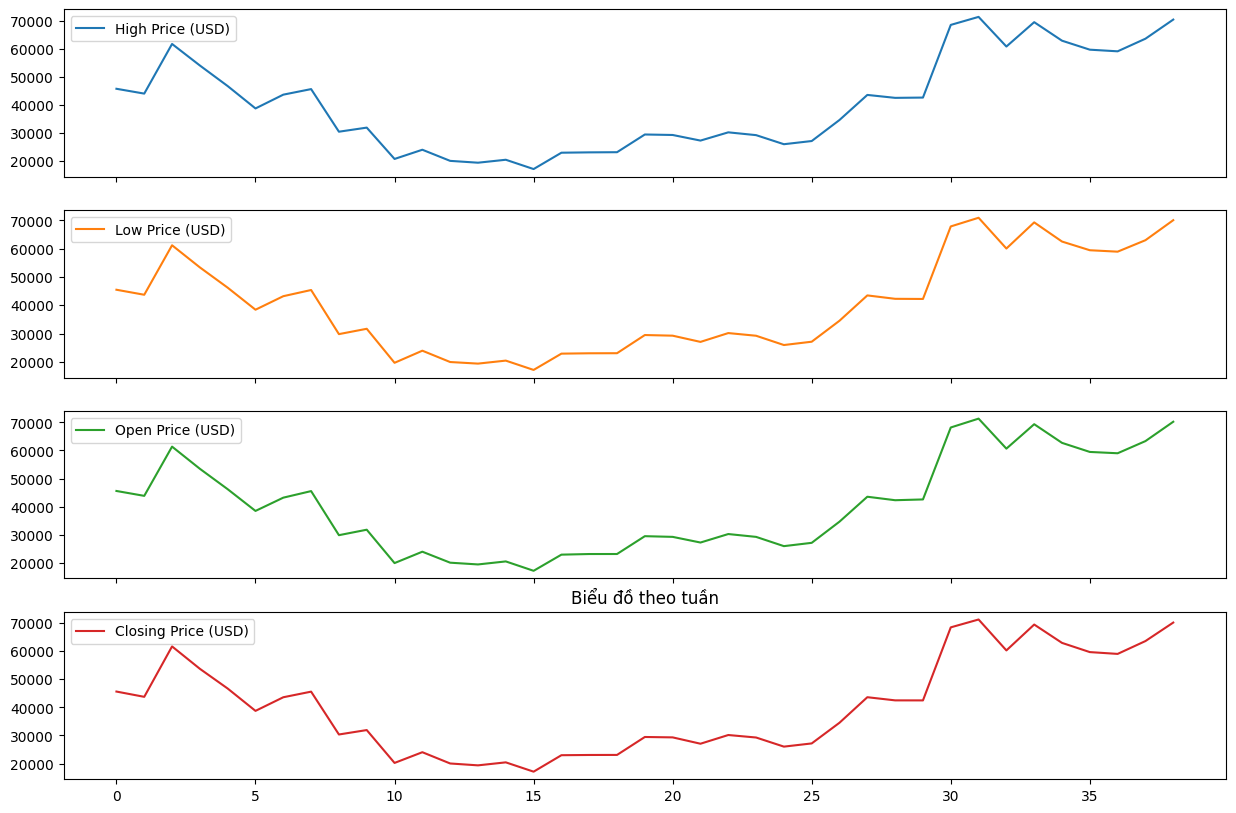

In [28]:
df_monthly[['High Price (USD)','Low Price (USD)','Open Price (USD)','Closing Price (USD)']].plot(subplots=True, figsize=(15,10))
plt.title('Biểu đồ theo tuần')

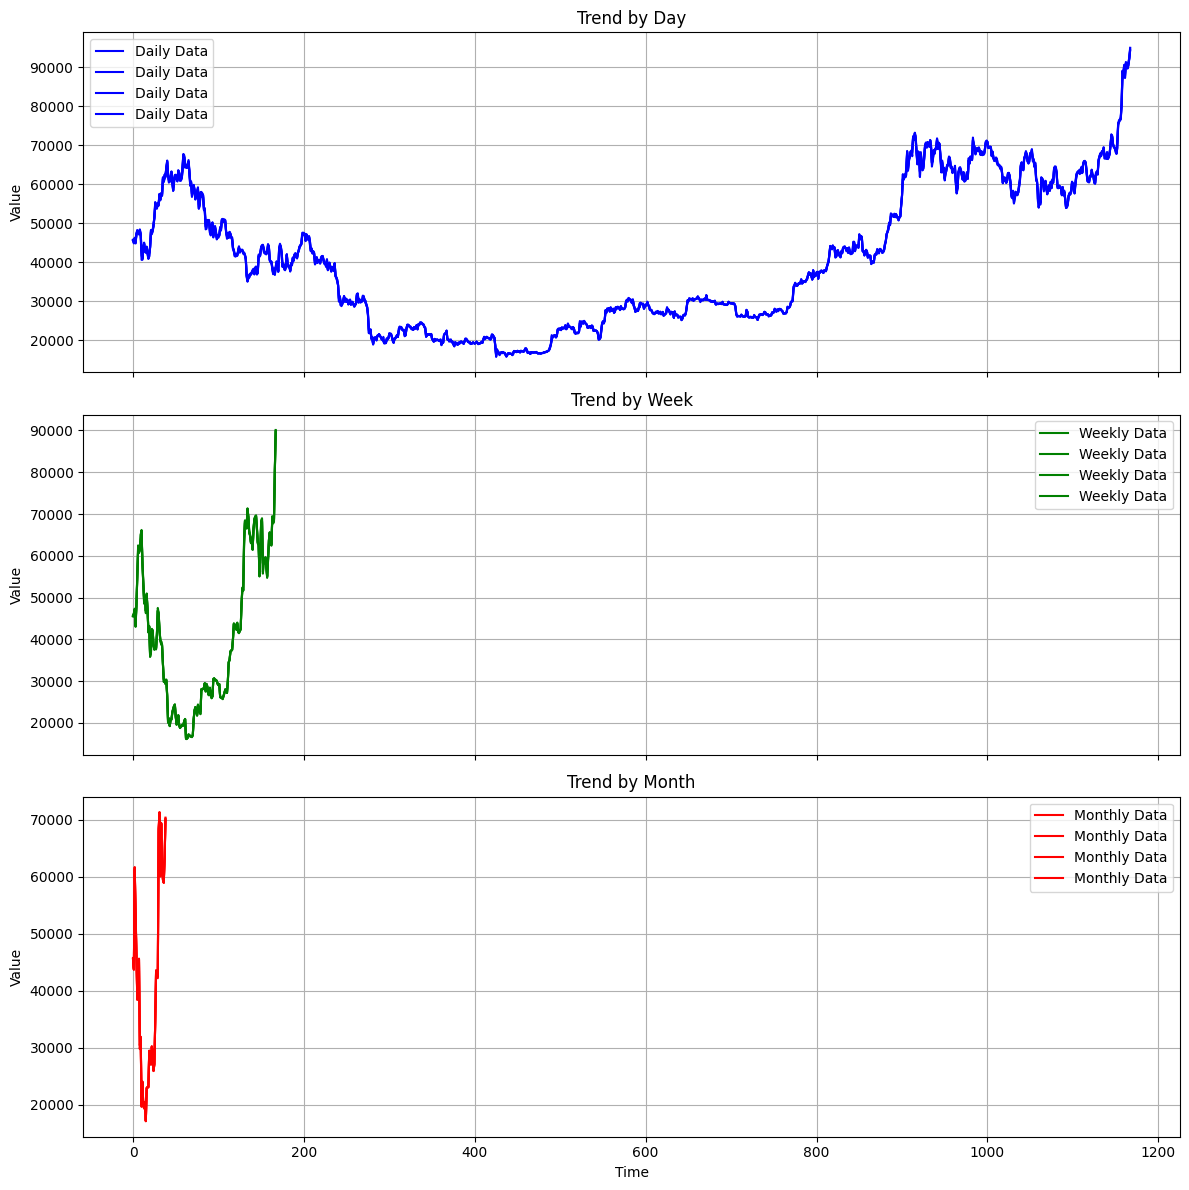

In [29]:
import matplotlib.pyplot as plt

# Tạo layout với 3 subplot
fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

# Biểu đồ hàng ngày
axes[0].plot(df_day.index, df_day[['High Price (USD)','Low Price (USD)','Open Price (USD)','Closing Price (USD)']], color='blue', label='Daily Data')
axes[0].set_title('Trend by Day')
axes[0].set_ylabel('Value')
axes[0].legend()
axes[0].grid(True)

# Biểu đồ hàng tuần
axes[1].plot(df_week.index, df_week[['High Price (USD)','Low Price (USD)','Open Price (USD)','Closing Price (USD)']], color='green', label='Weekly Data')
axes[1].set_title('Trend by Week')
axes[1].set_ylabel('Value')
axes[1].legend()
axes[1].grid(True)

# Biểu đồ hàng tháng
axes[2].plot(df_monthly.index, df_monthly[['High Price (USD)','Low Price (USD)','Open Price (USD)','Closing Price (USD)']], color='red', label='Monthly Data')
axes[2].set_title('Trend by Month')
axes[2].set_xlabel('Time')
axes[2].set_ylabel('Value')
axes[2].legend()
axes[2].grid(True)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


In [30]:
import plotly.graph_objects as go 
figure = go.Figure(data = [go.Candlestick(x = df_day["Timestamp"],
                                          open = df_day["Open Price (USD)"],
                                          close = df_day["Closing Price (USD)"],
                                          low = df_day["Low Price (USD)"],
                                          high = df_day["High Price (USD)"])])
figure.update_layout(title = "Price Analysis in all data", xaxis_rangeslider_visible = True)
figure.show()


In [31]:
import plotly.graph_objects as go 
figure = go.Figure(data = [go.Candlestick(x = df_week["Timestamp"],
                                          open = df_week["Open Price (USD)"],
                                          close = df_week["Closing Price (USD)"],
                                          low = df_week["Low Price (USD)"],
                                          high = df_week["High Price (USD)"])])
figure.update_layout(title = "Price Analysis in all data", xaxis_rangeslider_visible = True)
figure.show()


In [32]:
import plotly.graph_objects as go 
figure = go.Figure(data = [go.Candlestick(x = df_monthly["Timestamp"],
                                          open = df_monthly["Open Price (USD)"],
                                          close = df_monthly["Closing Price (USD)"],
                                          low = df_monthly["Low Price (USD)"],
                                          high = df_monthly["High Price (USD)"])])
figure.update_layout(title = "Price Analysis in all data", xaxis_rangeslider_visible = True)
figure.show()


partern 2 

In [33]:

# Nhóm theo tháng , quý , năm bằng cách lấy trugb bình cộng
df_day_avg = df.groupby('Day').mean().reset_index()
df_monthly_avg = df.groupby('Month').mean().reset_index()
df_week_avg = df.groupby('Week').mean().reset_index()
df_quarter_avg = df.groupby('Quarter').mean().reset_index()
df_year_avg = df.groupby('Year').mean().reset_index()



Text(0.5, 1.0, 'Biểu đồ theo ngày')

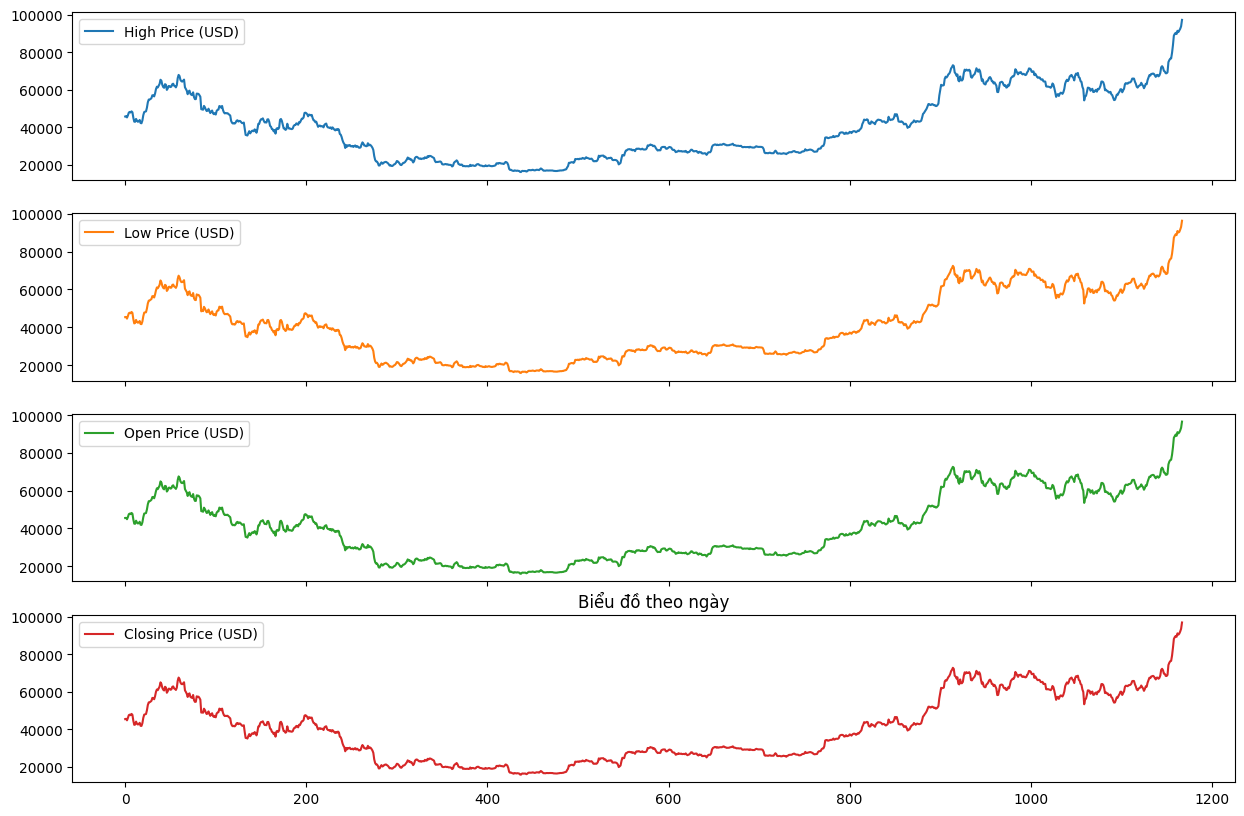

In [34]:
df_day_avg[['High Price (USD)','Low Price (USD)','Open Price (USD)','Closing Price (USD)']].plot(subplots=True, figsize=(15,10))
plt.title('Biểu đồ theo ngày')

Text(0.5, 1.0, 'Biểu đồ theo tuần')

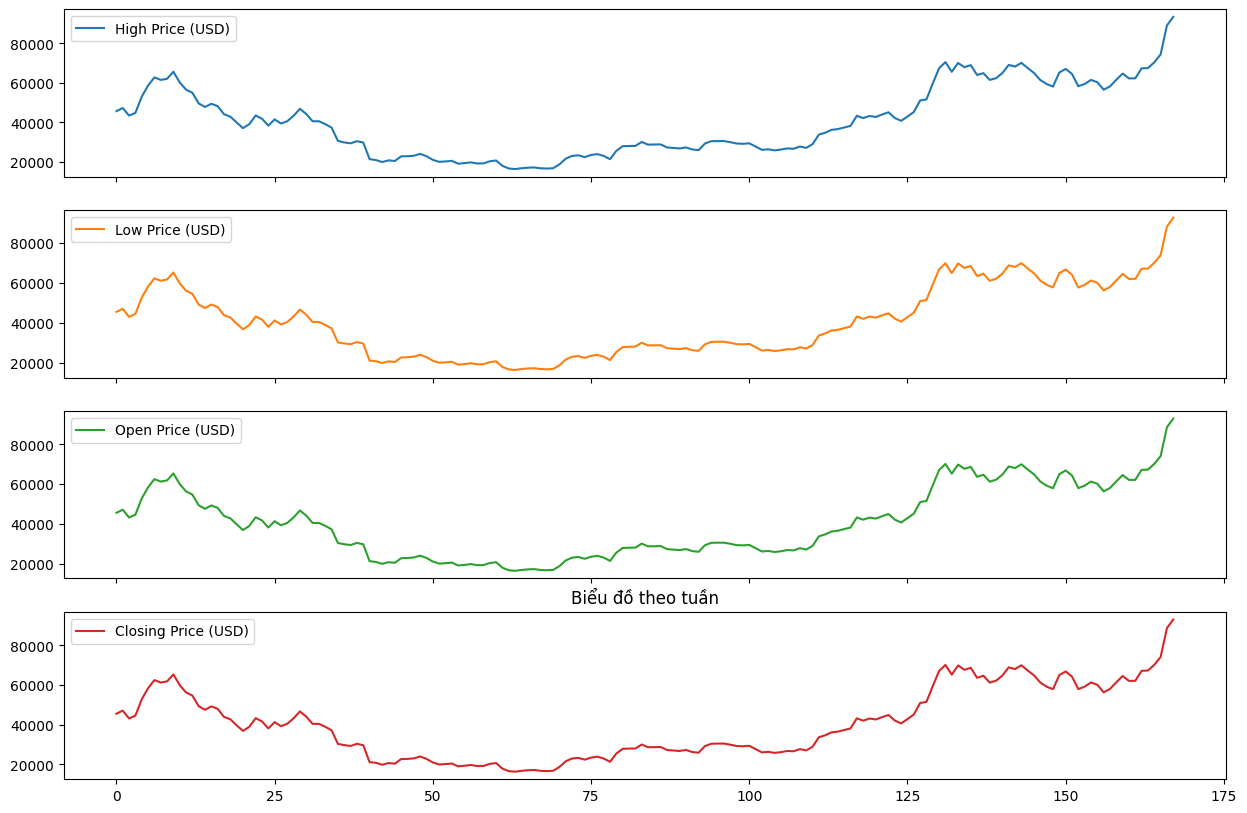

In [35]:
df_week_avg[['High Price (USD)','Low Price (USD)','Open Price (USD)','Closing Price (USD)']].plot(subplots=True, figsize=(15,10))
plt.title('Biểu đồ theo tuần')

Text(0.5, 1.0, 'Biểu đồ theo tháng')

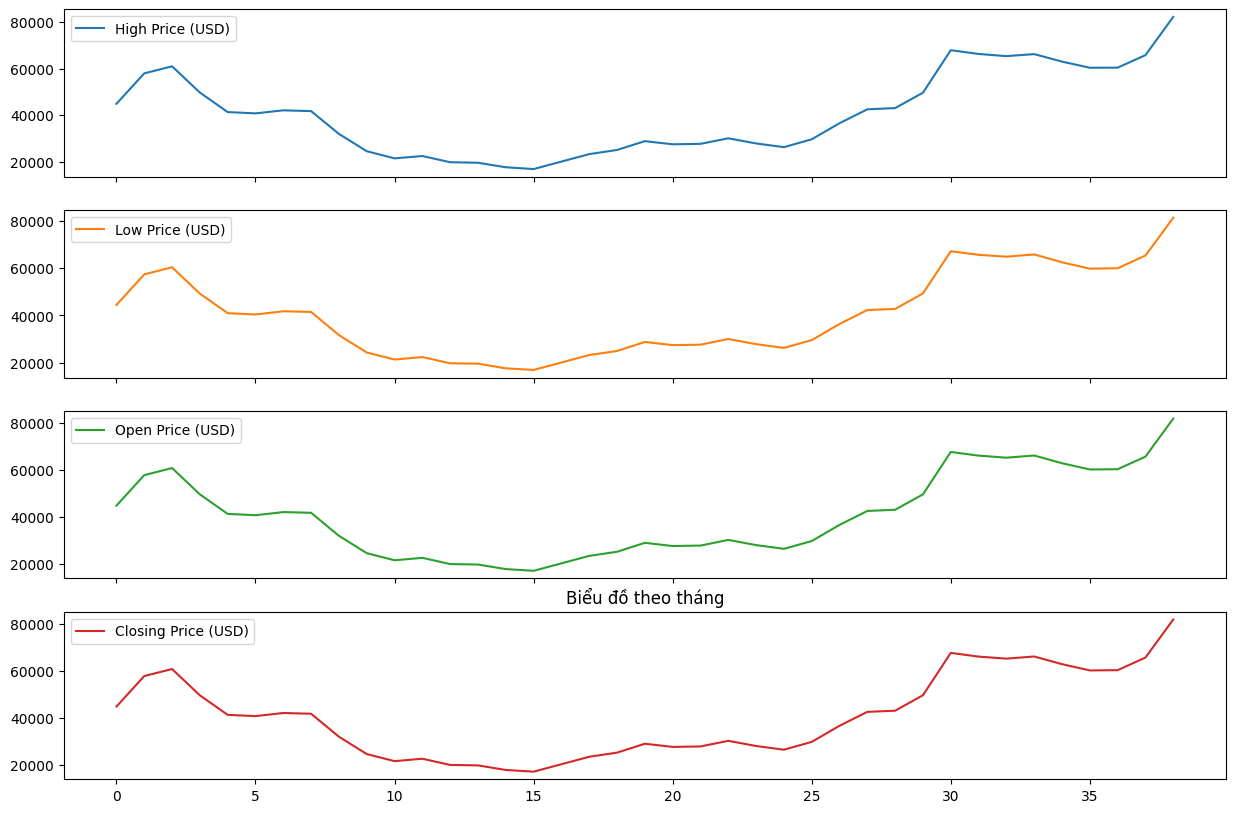

In [36]:
df_monthly_avg[['High Price (USD)','Low Price (USD)','Open Price (USD)','Closing Price (USD)']].plot(subplots=True, figsize=(15,10))
plt.title('Biểu đồ theo tháng')

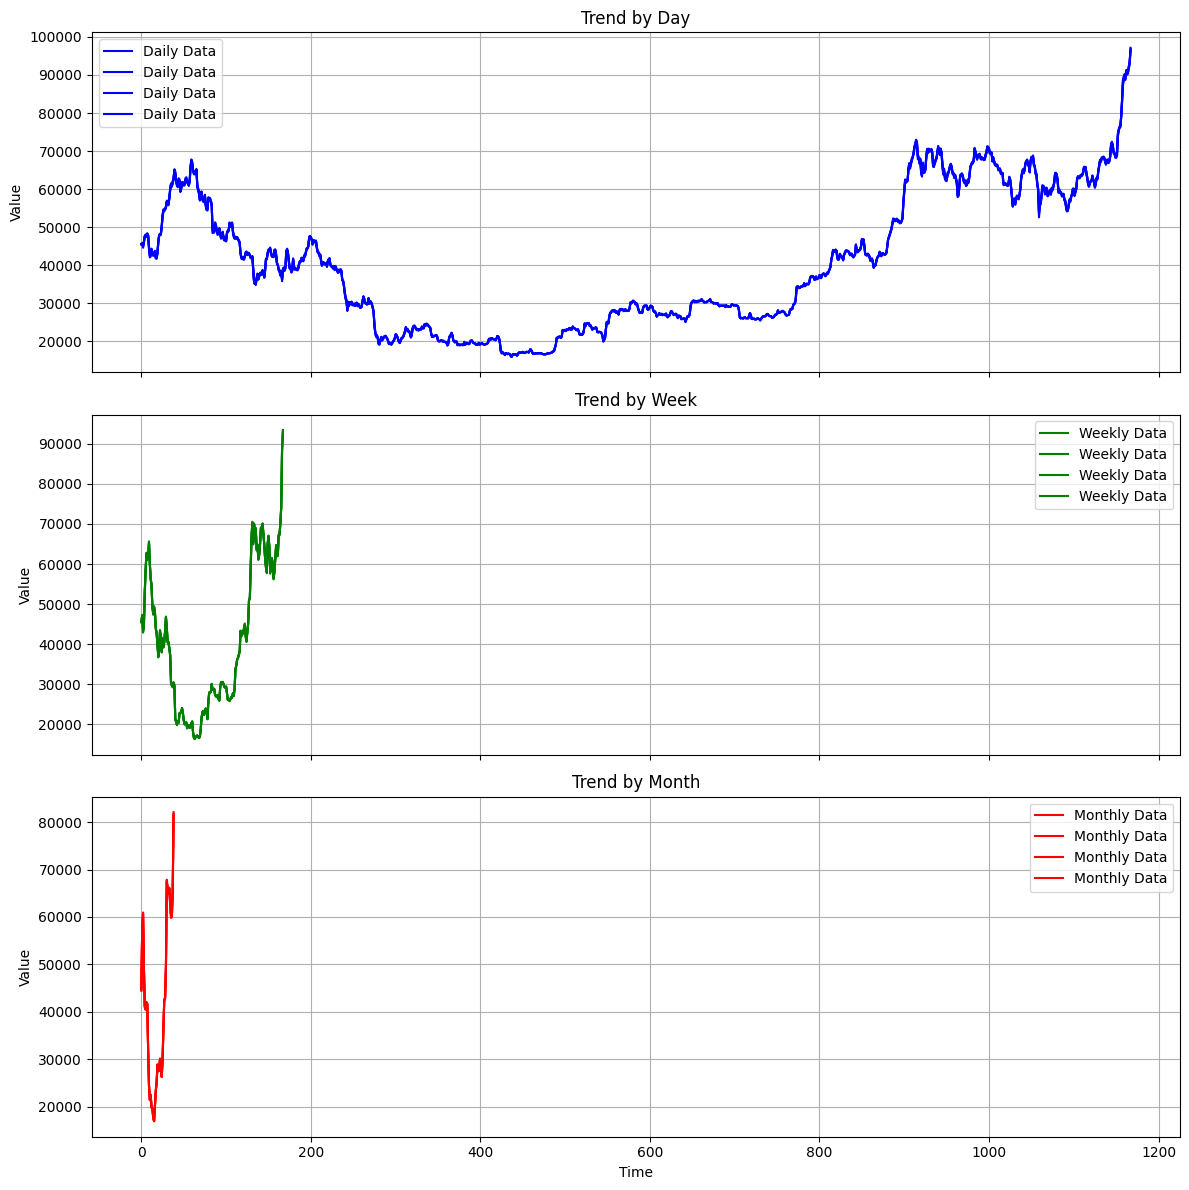

In [37]:
import matplotlib.pyplot as plt

# Tạo layout với 3 subplot
fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

# Biểu đồ hàng ngày
axes[0].plot(df_day_avg.index, df_day_avg[['High Price (USD)','Low Price (USD)','Open Price (USD)','Closing Price (USD)']], color='blue', label='Daily Data')
axes[0].set_title('Trend by Day')
axes[0].set_ylabel('Value')
axes[0].legend()
axes[0].grid(True)

# Biểu đồ hàng tuần
axes[1].plot(df_week_avg.index, df_week_avg[['High Price (USD)','Low Price (USD)','Open Price (USD)','Closing Price (USD)']], color='green', label='Weekly Data')
axes[1].set_title('Trend by Week')
axes[1].set_ylabel('Value')
axes[1].legend()
axes[1].grid(True)

# Biểu đồ hàng tháng
axes[2].plot(df_monthly_avg.index, df_monthly_avg[['High Price (USD)','Low Price (USD)','Open Price (USD)','Closing Price (USD)']], color='red', label='Monthly Data')
axes[2].set_title('Trend by Month')
axes[2].set_xlabel('Time')
axes[2].set_ylabel('Value')
axes[2].legend()
axes[2].grid(True)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


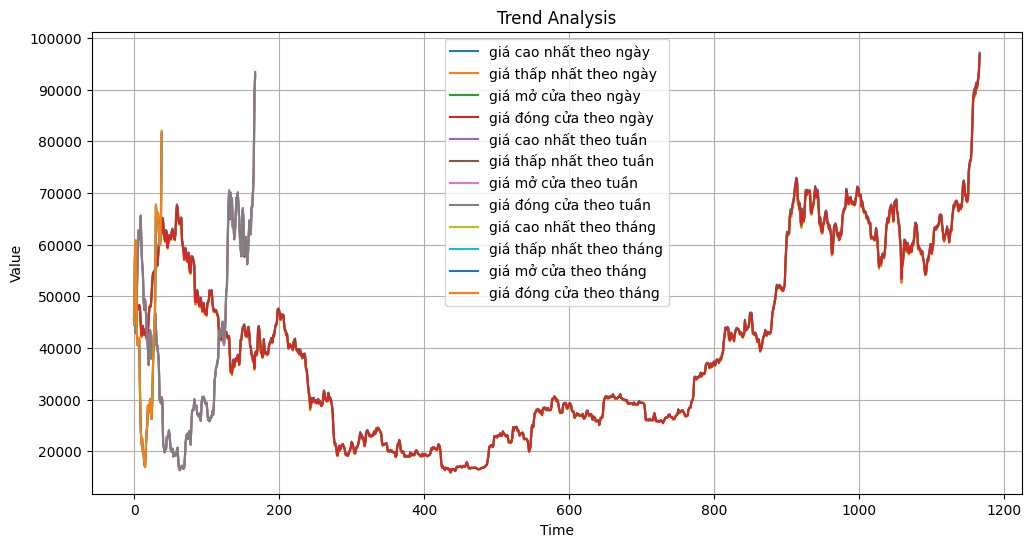

In [38]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ cho từng loại dữ liệu
plt.figure(figsize=(12, 6))

# Biểu đồ hàng ngày
plt.plot(df_day_avg.index, df_day_avg['High Price (USD)'], label='giá cao nhất theo ngày')
plt.plot(df_day_avg.index, df_day_avg['Low Price (USD)'], label='giá thấp nhất theo ngày')
plt.plot(df_day_avg.index, df_day_avg['Open Price (USD)'], label='giá mở cửa theo ngày')
plt.plot(df_day_avg.index, df_day_avg['Closing Price (USD)'], label='giá đóng cửa theo ngày')

# Biểu đồ hàng tuần
plt.plot(df_week_avg.index, df_week_avg['High Price (USD)'], label='giá cao nhất theo tuần')
plt.plot(df_week_avg.index, df_week_avg['Low Price (USD)'], label='giá thấp nhất theo tuần')
plt.plot(df_week_avg.index, df_week_avg['Open Price (USD)'], label='giá mở cửa theo tuần')
plt.plot(df_week_avg.index, df_week_avg['Closing Price (USD)'], label='giá đóng cửa theo tuần')

# Biểu đồ hàng tháng
plt.plot(df_monthly_avg.index, df_monthly_avg['High Price (USD)'], label='giá cao nhất theo tháng')
plt.plot(df_monthly_avg.index, df_monthly_avg['Low Price (USD)'], label='giá thấp nhất theo tháng')
plt.plot(df_monthly_avg.index, df_monthly_avg['Open Price (USD)'], label='giá mở cửa theo tháng')
plt.plot(df_monthly_avg.index, df_monthly_avg['Closing Price (USD)'], label='giá đóng cửa theo tháng')


# Thêm thông tin biểu đồ
plt.title('Trend Analysis')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()


In [39]:
import plotly.graph_objects as go 
figure = go.Figure(data = [go.Candlestick(x = df_day_avg["Timestamp"],
                                          open = df_day_avg["Open Price (USD)"],
                                          close = df_day_avg["Closing Price (USD)"],
                                          low = df_day_avg["Low Price (USD)"],
                                          high = df_day_avg["High Price (USD)"])])
figure.update_layout(title = "Price Analysis in all data", xaxis_rangeslider_visible = True)
figure.show()


In [40]:
import plotly.graph_objects as go 
figure = go.Figure(data = [go.Candlestick(x = df_monthly_avg["Timestamp"],
                                          open = df_monthly_avg["Open Price (USD)"],
                                          close = df_monthly_avg["Closing Price (USD)"],
                                          low = df_monthly_avg["Low Price (USD)"],
                                          high = df_monthly_avg["High Price (USD)"])])
figure.update_layout(title = "Price Analysis in all data", xaxis_rangeslider_visible = True)
figure.show()


partern 3 

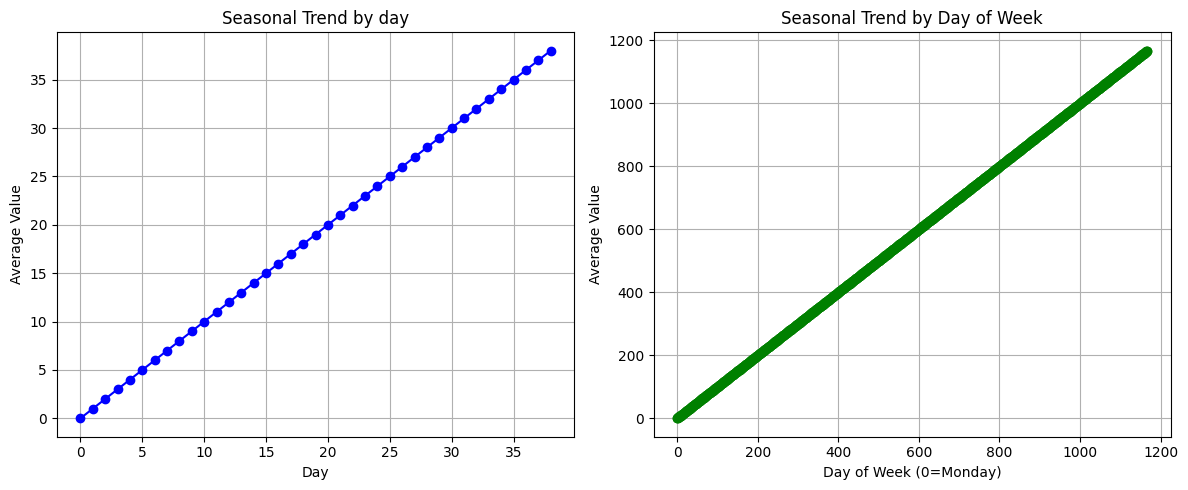

In [41]:
import matplotlib.pyplot as plt

# Vẽ seasonal line theo tháng
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(df_monthly_avg.index, df_monthly_avg.index, marker='o', color='blue')
plt.title('Seasonal Trend by day')
plt.xlabel('Day')
plt.ylabel('Average Value')
plt.grid(True)

# Vẽ seasonal line theo ngày trong tháng
plt.subplot(1, 2, 2)
plt.plot(df_day_avg.index, df_day_avg.index, marker='o', color='green')
plt.title('Seasonal Trend by Day of Week')
plt.xlabel('Day of Week (0=Monday)')
plt.ylabel('Average Value')
plt.grid(True)

plt.tight_layout()
plt.show()


partern 4 

In [42]:

numeric_data = df_day_avg.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()
print(correlation_matrix)


                     High Price (USD)  Low Price (USD)  Open Price (USD)  \
High Price (USD)             1.000000         0.999963          0.999990   
Low Price (USD)              0.999963         1.000000          0.999987   
Open Price (USD)             0.999990         0.999987          1.000000   
Volume From (BTC)           -0.160442        -0.166198         -0.163136   
Volume To (USD)              0.515883         0.510200          0.513201   
Closing Price (USD)          0.999990         0.999989          0.999995   

                     Volume From (BTC)  Volume To (USD)  Closing Price (USD)  
High Price (USD)             -0.160442         0.515883             0.999990  
Low Price (USD)              -0.166198         0.510200             0.999989  
Open Price (USD)             -0.163136         0.513201             0.999995  
Volume From (BTC)             1.000000         0.653176            -0.163163  
Volume To (USD)               0.653176         1.000000             0.51

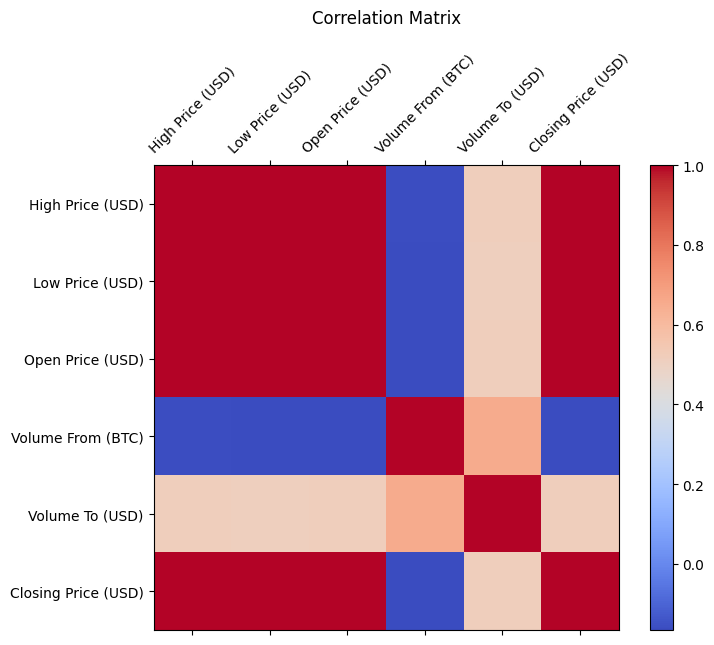

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)  
plt.colorbar()
plt.title('Correlation Matrix', pad=20)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

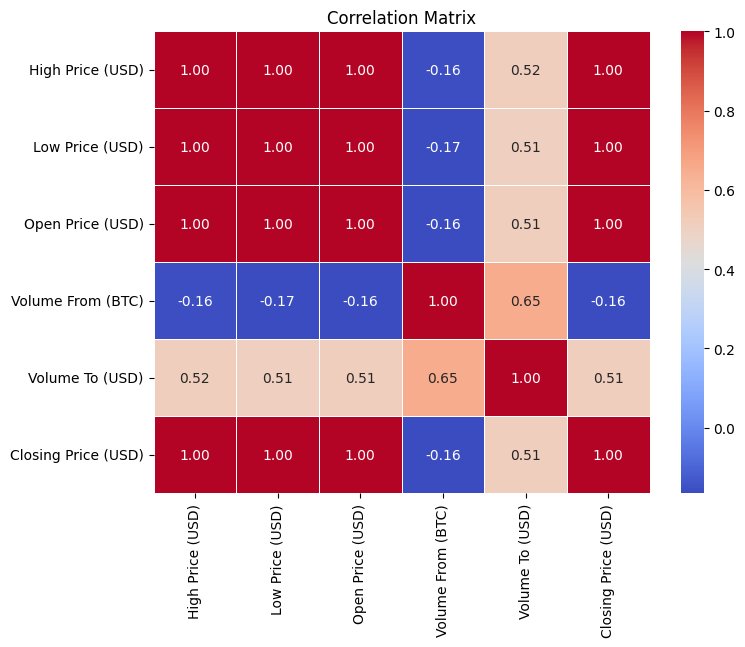

In [44]:
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


partern 5 

In [45]:
#chọn dữ liệu tháng rồi chọn ra các truòng cần để vẽ biểu đồ
numeric_data = df_monthly_avg[['Open Price (USD)', 'Closing Price (USD)', 'High Price (USD)','Low Price (USD)']]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)
scaled_df = pd.DataFrame(scaled_data, columns=['Open Price (USD)', 'Closing Price (USD)', 'High Price (USD)','Low Price (USD)'])

In [46]:

categories = list(scaled_df.columns)

values = scaled_df.values.tolist()
values.append(values[0])  


angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]  
print (categories)


['Open Price (USD)', 'Closing Price (USD)', 'High Price (USD)', 'Low Price (USD)']


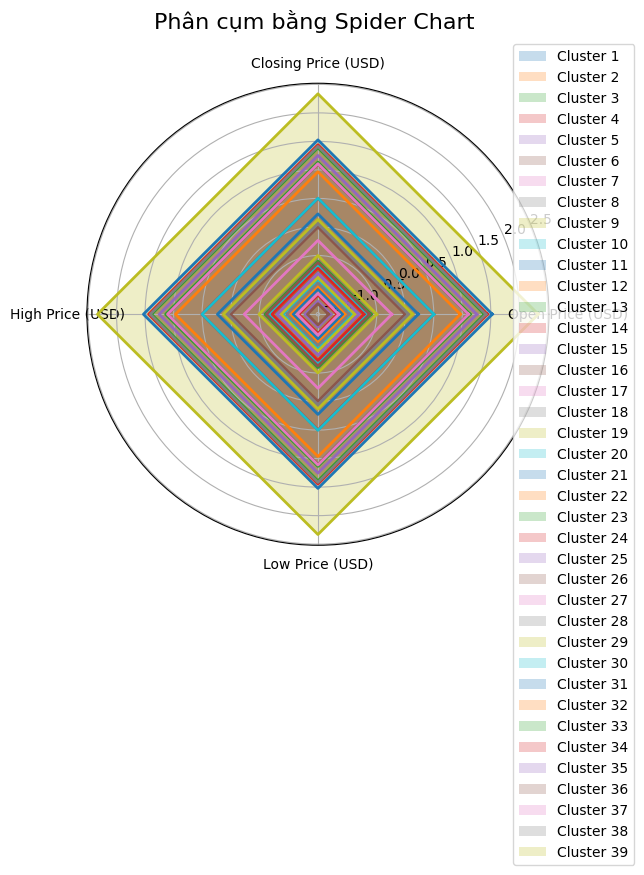

In [47]:
#Phân theo tháng
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for i, value in enumerate(values[:-1]): 
    ax.fill(angles, value + value[:1], alpha=0.25, label=f"Cluster {i+1}")
    ax.plot(angles, value + value[:1], linewidth=2)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
plt.title("Phân cụm bằng Spider Chart ", size=16, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.show()


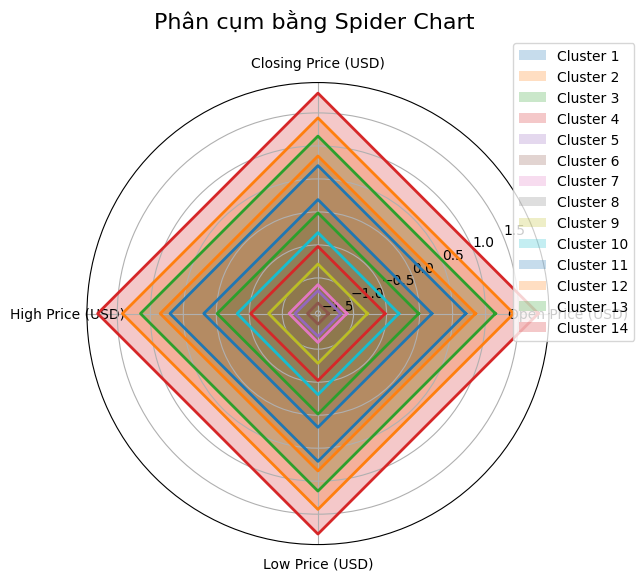

In [48]:
#chọn dữ liệu quý rồi chọn ra các truòng cần để vẽ biểu đồ
numeric_data = df_quarter_avg[['Open Price (USD)', 'Closing Price (USD)', 'High Price (USD)','Low Price (USD)']]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)
scaled_df = pd.DataFrame(scaled_data, columns=['Open Price (USD)', 'Closing Price (USD)', 'High Price (USD)','Low Price (USD)'])

categories = list(scaled_df.columns)


values = scaled_df.values.tolist()
values.append(values[0])  


angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]  

#Phân theo quý
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for i, value in enumerate(values[:-1]): 
    ax.fill(angles, value + value[:1], alpha=0.25, label=f"Cluster {i+1}")
    ax.plot(angles, value + value[:1], linewidth=2)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
plt.title("Phân cụm bằng Spider Chart ", size=16, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.show()


Không khuyến khích làm cái này vì nghĩ sẽ có nhiều data thì nó sẽ xử lý nhiều thời gian

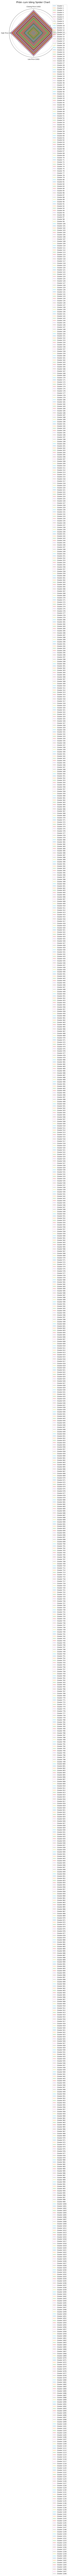

In [49]:
#chọn dữ liệu ngày rồi chọn ra các truòng cần để vẽ biểu đồ
numeric_data = df_day_avg[['Open Price (USD)', 'Closing Price (USD)', 'High Price (USD)','Low Price (USD)']]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)
scaled_df = pd.DataFrame(scaled_data, columns=['Open Price (USD)', 'Closing Price (USD)', 'High Price (USD)','Low Price (USD)'])
categories = list(scaled_df.columns)


values = scaled_df.values.tolist()
values.append(values[0])  


angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]  

#Phân theo ngày
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for i, value in enumerate(values[:-1]): 
    ax.fill(angles, value + value[:1], alpha=0.25, label=f"Cluster {i+1}")
    ax.plot(angles, value + value[:1], linewidth=2)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
plt.title("Phân cụm bằng Spider Chart ", size=16, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.show()

In [50]:
# from autots import AutoTS

# model = AutoTS(forecast_length = 5, frequency = "infer", ensemble = "simple")
# model = model.fit(df_monthly_avg, date_col = "Timestamp", value_col = "Closing Price (USD)", id_col = None)
# prediction = model.predict()
# forecast = prediction.forecast
# print(forecast)


In [51]:
# #df['Timestamp'] = pd.to_datetime(df['Timestamp'])  # Chuyển đổi cột 'Date' sang dạng datetime
# df_monthly_avg['Timestamp'] = df_monthly_avg['Timestamp'].map(pd.Timestamp.toordinal)  
# df_monthly_avg.head()

In [52]:
# correlation = df_monthly_avg.corr()
# print(correlation["Closing Price (USD)"].sort_values(ascending = True))


In [53]:
import pandas as pd #đọc dữ liệu
import numpy as np #xử lý dữ liệu
import matplotlib.pyplot as plt #vẽ biểu đồ
from sklearn.preprocessing import MinMaxScaler #chuẩn hóa dữ liệu
from keras.callbacks import ModelCheckpoint #lưu lại huấn luyện tốt nhất
from tensorflow.keras.models import load_model #tải mô hình

#các lớp để xây dựng mô hình
from keras.models import Sequential #đầu vào
from keras.layers import LSTM #học phụ thuộc
from keras.layers import Dropout #tránh học tủ
from keras.layers import Dense #đầu ra

#kiểm tra độ chính xác của mô hình
from sklearn.metrics import r2_score #đo mức độ phù hợp
from sklearn.metrics import mean_absolute_error #đo sai số tuyệt đối trung bình
from sklearn.metrics import mean_absolute_percentage_error #đo % sai số tuyệt đối trung bình


In [54]:
df_day_avg['Day'] = pd.to_datetime(df_day_avg['Timestamp'])

# Lấy thông tin năm từ cột 'Ngày'
df_day_avg['year'] = df_day_avg['Day'].dt.year

print(df_day_avg['Day'].dtype)


datetime64[ns]


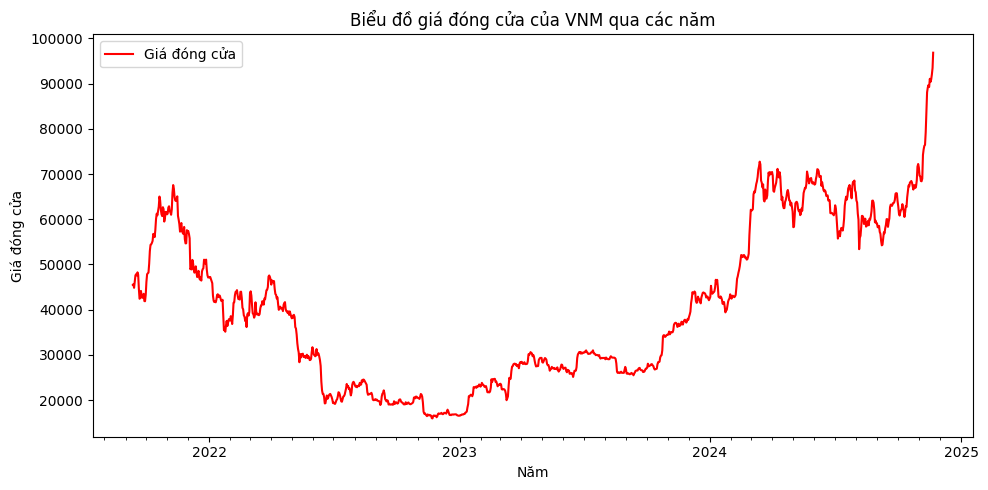

In [55]:
from matplotlib.dates import YearLocator, DateFormatter, MonthLocator # Thêm MonthLocator vào để sửa lỗi





# Tạo đồ thị giá đóng cửa qua các năm
plt.figure(figsize=(10, 5))
plt.plot(df_day_avg['Day'], df_day_avg['Closing Price (USD)'], label='Giá đóng cửa', color='red')
plt.xlabel('Năm')
plt.ylabel('Giá đóng cửa')
plt.title('Biểu đồ giá đóng cửa của VNM qua các năm')
plt.legend(loc='best')

# Định dạng đồ thị hiển thị các ngày tháng theo năm-tháng
years = YearLocator()
yearsFmt = DateFormatter('%Y')
months = MonthLocator()  # Thêm dòng này để khai báo MonthLocator
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(yearsFmt)
plt.gca().xaxis.set_minor_locator(months)

plt.tight_layout()
plt.show()

In [56]:
df1 = pd.DataFrame(df_day_avg,columns=['Day','Closing Price (USD)'])
df1.index = df1.Day
df1.drop('Day',axis=1,inplace=True)


In [57]:
#chia tập dữ liệu
data = df1.values
train_data = data[:1500]
test_data = data[1500:]
print(data)

[[45500.26166667]
 [45644.64958333]
 [44839.00958333]
 ...
 [92041.47958333]
 [93471.69291667]
 [96850.08111111]]


In [58]:
#chuẩn hóa dữ liệu
sc = MinMaxScaler(feature_range=(0,1))
sc_train = sc.fit_transform(data)
     

In [59]:
x_train,y_train=[],[]
for i in range(50,len(train_data)):
  x_train.append(sc_train[i-50:i,0]) #lấy 50 giá đóng cửa liên tục
  y_train.append(sc_train[i,0]) #lấy ra giá đóng cửa ngày hôm sau

In [60]:
print(x_train)

print(y_train)

[array([0.36534462, 0.36712917, 0.35717191, 0.37287434, 0.39111285,
       0.39444136, 0.39088663, 0.39945872, 0.39265294, 0.35377728,
       0.32727483, 0.3293574 , 0.3486263 , 0.33564312, 0.32973546,
       0.33223772, 0.34077246, 0.32096889, 0.3204439 , 0.33837902,
       0.37346724, 0.3943037 , 0.39677963, 0.39867783, 0.42258517,
       0.45782161, 0.47488199, 0.47611357, 0.47997245, 0.48535738,
       0.50463177, 0.50257616, 0.49573144, 0.51554803, 0.54477496,
       0.55983077, 0.5553016 , 0.56700244, 0.57914094, 0.60666775,
       0.59628627, 0.57093225, 0.55826135, 0.55318855, 0.57757632,
       0.57226768, 0.53829536, 0.54838658, 0.56477212, 0.56453128]), array([0.36712917, 0.35717191, 0.37287434, 0.39111285, 0.39444136,
       0.39088663, 0.39945872, 0.39265294, 0.35377728, 0.32727483,
       0.3293574 , 0.3486263 , 0.33564312, 0.32973546, 0.33223772,
       0.34077246, 0.32096889, 0.3204439 , 0.33837902, 0.37346724,
       0.3943037 , 0.39677963, 0.39867783, 0.42258517, 0.45

In [61]:
#xếp dữ liệu thành 1 mảng 2 chiều
x_train = np.array(x_train)
y_train = np.array(y_train)

#xếp lại dữ liệu thành mảng 1 chiều
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
y_train = np.reshape(y_train,(y_train.shape[0],1))

In [62]:
#xây dựng mô hình
model = Sequential() #tạo lớp mạng cho dữ liệu đầu vào
#2 lớp LSTM
model.add(LSTM(units=128,input_shape=(x_train.shape[1],1),return_sequences=True))
model.add(LSTM(units=64))
model.add(Dropout(0.5)) #loại bỏ 1 số đơn vị tránh học tủ (overfitting)
model.add(Dense(1)) #output đầu ra 1 chiều
#đo sai số tuyệt đối trung bình có sử dụng trình tối ưu hóa adam
model.compile(loss='mean_absolute_error',optimizer='adam')
     

In [64]:

# #huấn luyện mô hình
# save_model = "D:\model\save_model.hdf5"
# best_model = ModelCheckpoint(save_model,monitor='loss',verbose=2,save_best_only=True,mode='auto')
# model.fit(x_train,y_train,epochs=100,batch_size=50,verbose=2,callbacks=[best_model])

In [65]:

#dữ liệu train
y_train = sc.inverse_transform(y_train) #giá thực
final_model = load_model("D:\model\save_model.hdf5")
y_train_predict = final_model.predict(x_train) #dự đoán giá đóng cửa trên tập đã train
y_train_predict = sc.inverse_transform(y_train_predict) #giá dự đoán

35/35 [==============================] - 1s 19ms/step


In [66]:
print(y_train_predict)

[[62257.652]
 [62430.28 ]
 [62587.984]
 ...
 [92384.695]
 [92647.766]
 [93266.72 ]]


In [67]:
# Xử lý dữ liệu test
test = df1[len(train_data)-15:].values

# Kiểm tra dữ liệu không hợp lệ
print(f"Original test data: {test[:10]}")

# Chuyển đổi mọi giá trị sang số
test = pd.to_numeric(test.flatten(), errors='coerce').reshape(-1, 1)

# Loại bỏ NaN
if np.isnan(test).any():
    print("Found NaN values, removing...")
    test = test[~np.isnan(test).flatten()]

# Kiểm tra lại sau khi xử lý
print(f"Cleaned test data: {test[:10]}")

# Transform dữ liệu
sc_test = sc.transform(test)


Original test data: [[75466.24125   ]
 [76239.58875   ]
 [76449.81291667]
 [79230.98041667]
 [83376.38416667]
 [88080.9375    ]
 [89104.39291667]
 [89679.47833333]
 [89246.13291667]
 [91073.45416667]]
Cleaned test data: [[75466.24125   ]
 [76239.58875   ]
 [76449.81291667]
 [79230.98041667]
 [83376.38416667]
 [88080.9375    ]
 [89104.39291667]
 [89679.47833333]
 [89246.13291667]
 [91073.45416667]]


In [83]:
import numpy as np

# Your existing loop to populate x_test
x_test = []
sequence_length = 5  # Choose a smaller sequence length if test data is small

for i in range(sequence_length, test.shape[0]):
    x_test.append(sc_test[i-sequence_length:i, 0])

# Convert x_test to a NumPy array before reshaping
x_test = np.array(x_test)

# Reshape x_test to 3D array as needed by the model
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Now you can proceed with your y_test and prediction
y_test = data[1000:]  # Actual prices (ensure this is defined earlier)
y_test_predict = final_model.predict(x_test)
y_test_predict = sc.inverse_transform(y_test_predict)  # Inverse transformation of predicted values

print(y_test_predict)


1/1 [==============================] - 0s 57ms/step
[[81155.72 ]
 [84371.695]
 [87632.42 ]
 [90329.43 ]
 [91910.21 ]
 [93027.8  ]
 [93492.19 ]
 [93874.664]
 [94421.96 ]
 [95310.8  ]]


In [84]:
train_data1 = df1[15:1000].copy()
test_data1 = df1[1000:].copy()
print (train_data1,test_data1)


                     Closing Price (USD)
Day                                     
2021-09-26 11:30:00         42821.590000
2021-09-27 11:30:00         43512.134583
2021-09-28 11:30:00         41909.832083
2021-09-29 11:30:00         41867.355417
2021-09-30 11:30:00         43318.481250
...                                  ...
2024-06-02 11:30:00         67816.965833
2024-06-03 11:30:00         68950.962500
2024-06-04 11:30:00         69624.641667
2024-06-05 11:30:00         71076.473750
2024-06-06 11:30:00         70998.334583

[985 rows x 1 columns]                      Closing Price (USD)
Day                                     
2024-06-07 11:30:00         70622.019583
2024-06-08 11:30:00         69390.390417
2024-06-09 11:30:00         69466.665833
2024-06-10 11:30:00         69580.736667
2024-06-11 11:30:00         67412.052917
...                                  ...
2024-11-17 11:30:00         90382.318333
2024-11-18 11:30:00         90946.409583
2024-11-19 11:30:00         92041

In [85]:
print(f"train_data1 shape: {train_data1.shape}")
print(f"test_data1 shape: {test_data1.shape}")
print(f"Length of y_train_predict: {len(y_train_predict)}")
print(f"Length of y_test_predict: {len(y_test_predict)}")


train_data1 shape: (985, 1)
test_data1 shape: (168, 1)
Length of y_train_predict: 985
Length of y_test_predict: 10


In [86]:
y_train_predict = y_train_predict[:len(train_data1)]
y_test_predict = y_test_predict[:len(test_data1)]


C:\Users\pc\AppData\Local\Temp\ipykernel_30776\2840822414.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



ValueError: Length of values (10) does not match length of index (168)

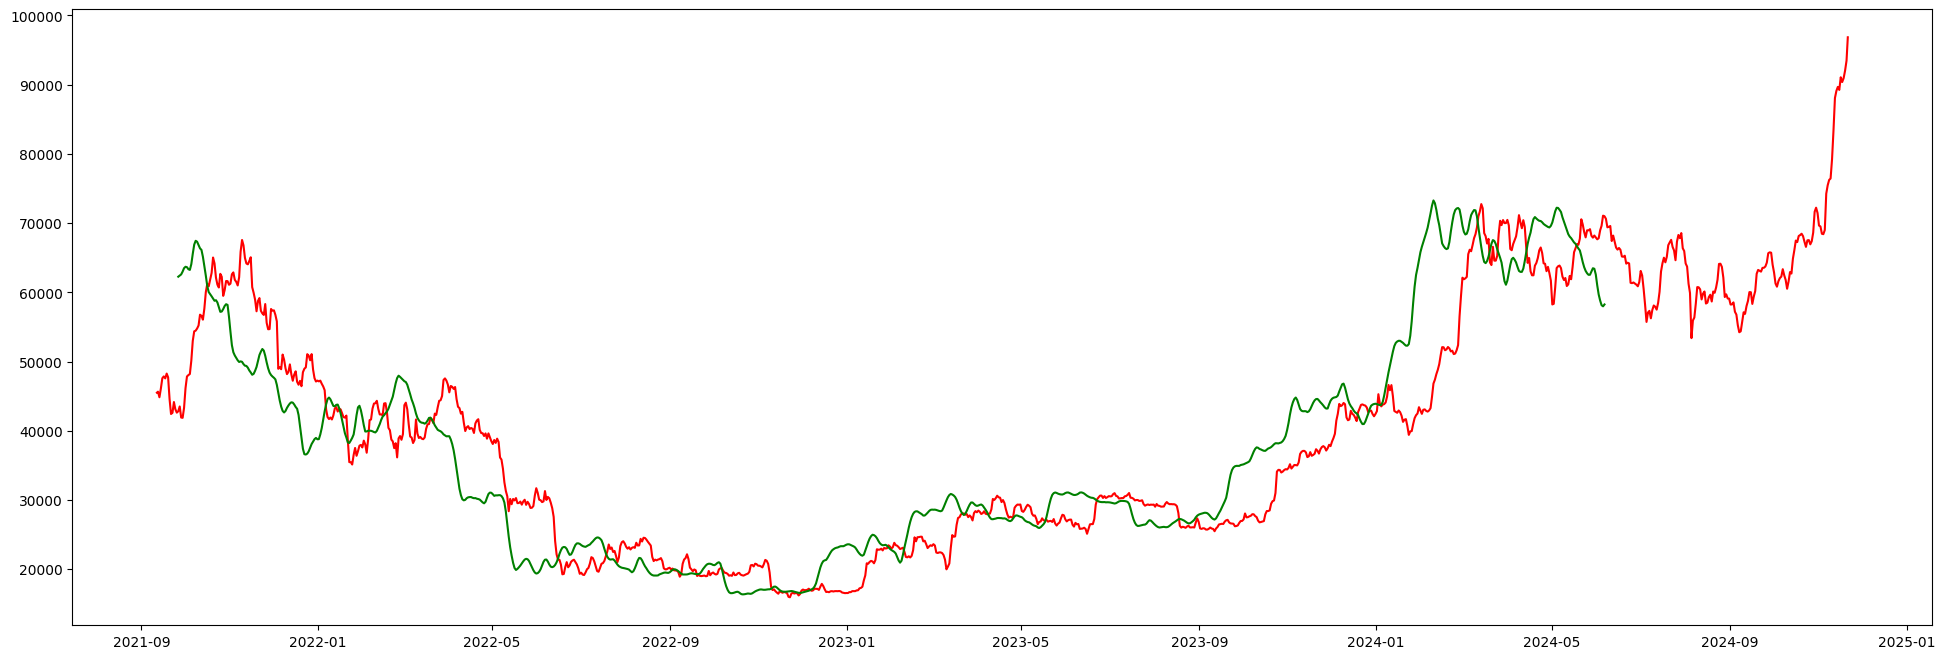

In [87]:
#lập biểu đồ so sánh
train_data1 = df1[15:1000]
test_data1 = df1[1000:]

plt.figure(figsize=(24,8))
plt.plot(df1,label='Giá thực tế',color='red') #đường giá thực
train_data1['Dự đoán'] = y_train_predict #thêm dữ liệu
plt.plot(train_data1['Dự đoán'],label='Giá dự đoán train',color='green') #đường giá dự báo train
test_data1['Dự đoán'] = y_test_predict #thêm dữ liệu
plt.plot(test_data1['Dự đoán'],label='Giá dự đoán test',color='blue') #đường giá dự báo test
plt.title('So sánh giá dự báo và giá thực tế') #đặt tên biểu đồ
plt.xlabel('Thời gian') #đặt tên hàm x
plt.ylabel('Giá đóng cửa (USD)') #đặt tên hàm y
plt.legend() #chú thích
plt.show()

In [92]:
df1.head()

Closing Price (USD) Ngày  Đóng cửa
2021-09-11 17:30:00         45500.261667  NaT       NaN
2021-09-12 11:30:00         45644.649583  NaT       NaN
2021-09-13 11:30:00         44839.009583  NaT       NaN
2021-09-14 11:30:00         46109.489583  NaT       NaN
2021-09-15 11:30:00         47585.163333  NaT       NaN

1/1 [==============================] - 0s 20ms/step


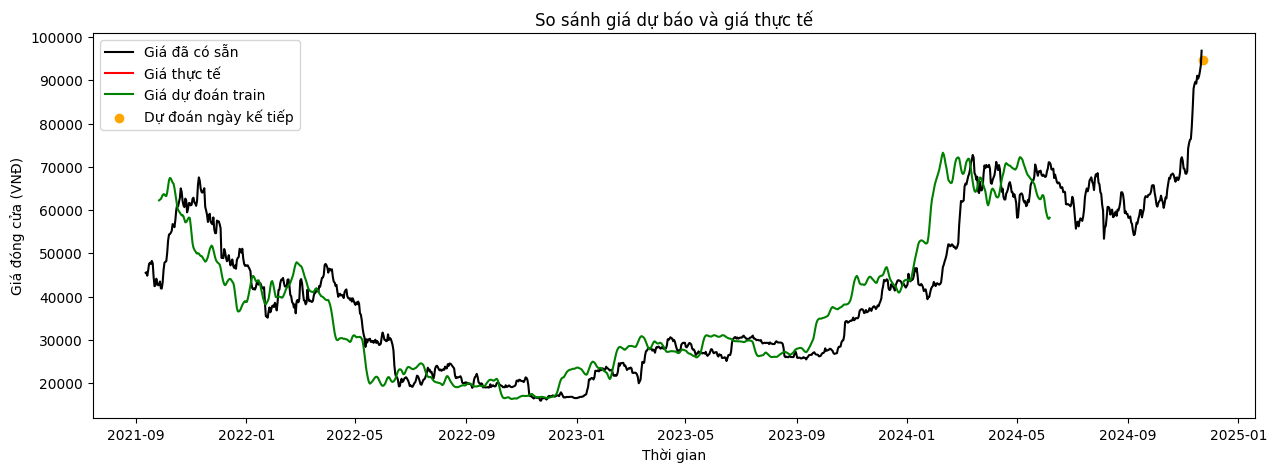

In [93]:
# Lấy ngày kế tiếp sau ngày cuối cùng trong tập dữ liệu để dự đoán
next_date = df_day_avg['Day'].iloc[-1] + pd.Timedelta(days=1)

# Chuyển đổi ngày kế tiếp sang dạng datetime
next_date = pd.to_datetime(next_date)

# Lấy giá trị của ngày cuối cùng trong tập dữ liệu
next_closing_price = np.array([df_day_avg['Closing Price (USD)'].iloc[-1]])  # Lấy giá trị đóng cửa của ngày cuối cùng

# Chuẩn hóa giá trị của ngày cuối cùng
next_closing_price_normalized = sc.transform(next_closing_price.reshape(-1, 1))  # Chuyển thành mảng 2D

# Tạo dự đoán cho ngày kế tiếp bằng mô hình đã huấn luyện
x_next = np.array([sc_train[-50:, 0]])  # Lấy 50 giá đóng cửa gần nhất
x_next = np.reshape(x_next, (x_next.shape[0], x_next.shape[1], 1))
y_next_predict = final_model.predict(x_next)
y_next_predict = sc.inverse_transform(y_next_predict)

# Thêm dữ liệu dự đoán của ngày kế tiếp vào DataFrame
df_next = pd.DataFrame({'Ngày': [next_date], 'Đóng cửa': [y_next_predict[0][0]]})
df1 = pd.concat([df1, df_next])

# Vẽ biểu đồ mới với dự đoán cho ngày kế tiếp
plt.figure(figsize=(15, 5))
plt.plot(df_day_avg['Day'],df_day_avg['Closing Price (USD)'], label='Giá đã có sẵn',color='black')
plt.plot(df1['Ngày'], df1['Closing Price (USD)'], label='Giá thực tế', color='red')
plt.plot(train_data1.index, train_data1['Dự đoán'], label='Giá dự đoán train', color='green')
# plt.plot(test_data1.index, test_data1['Dự đoán'], label='Giá dự đoán test', color='blue')
plt.scatter([next_date], [y_next_predict[0][0]], color='orange', label='Dự đoán ngày kế tiếp')
plt.xlabel('Thời gian')
plt.ylabel('Giá đóng cửa (VNĐ)')
plt.title('So sánh giá dự báo và giá thực tế')
plt.legend()
plt.show()
